**Question No.2. NLP Dataset**
---
Sentiment Analysis dataset - 1.6 Million tweets. Please find your dataset https://www.kaggle.com/kazanova/sentiment140. The column 'text' has the tweet and 'target' gives the sentiment of the text.

Prepare a python notebook (recommended-use Google Colab) to build, train and evaluate a deep neural network on the given dataset. Read the instructions carefully.

**Import Libraries/Dataset**
---


1.   Import required libraries (recommended-use tensorflow/keraslibrary).
2.   Import the dataset (use Google Drive if required).
3.   Check the GPU available (recommended-use free GPU provided by Google Colab).




##Import Libraries

In [54]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"

In [3]:


import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
# from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

import random
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report

# !pip install --upgrade tensorflow_hub

import tensorflow_hub as hub

import time

In [4]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
#tf.random.set_seed(42)  # sets the graph-level random seed

## Dataset

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/kaggle/'  #change dir to your project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
%cd /content/gdrive/My Drive//kaggle/SentimentAnalysis/
!ls

/content/gdrive/My Drive/kaggle/SentimentAnalysis
training.1600000.processed.noemoticon.csv


In [7]:
DATASET_ENCODING = "ISO-8859-1"
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
#DATASET_COLUMNS = ["target", "text"]
DATASET_PATH = "/content/gdrive/My Drive/kaggle/SentimentAnalysis/training.1600000.processed.noemoticon.csv"

seands = pd.read_csv(DATASET_PATH, encoding = DATASET_ENCODING, names = DATASET_COLUMNS)


In [8]:
seands.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
seands = seands[["target", "text"]]
seands.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
seands['target'].value_counts()

4    800000
0    800000
Name: target, dtype: int64

## Check the GPU available

In [11]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [12]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=1e7c5ce3f596deb61e089964cb60b7d74dfc550a48ddb21ca0622b5f33b8155f
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.1 GB  | Proc size: 1.0 GB
GPU RAM Free: 14968MB | Used: 111MB | Util   1% | Total 15079MB


##Data Visualization
---
1.   Print at least two tweets from each class of the dataset, for a sanity check that labels match the text.
2.   Plot a bar graph of class distribution in dataset. Each bar depicts the number of tweets belonging to a particular sentiment. (recommended -matplotlib/seaborn libraries)
3.   Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
4.   Print the shapes of train and test data.

**Tweets from each class of the dataset**

In [13]:
# 0 = negative
seands[seands.target==0].head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [14]:
# 2 = neutral 
seands[seands.target==2].head()

,target,text


In [15]:
# 4 = positive
seands[seands.target==4].head()

,target,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


**Bar graph of class distribution in dataset**

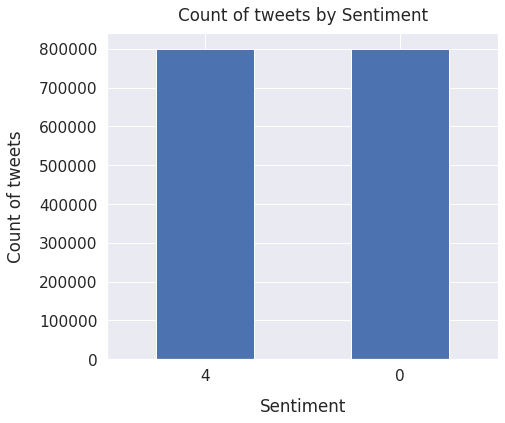

In [16]:
sns.set(font_scale=1.4)
seands['target'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("Count of tweets", labelpad=14)
plt.title("Count of tweets by Sentiment", y=1.02);

**shapes of train and test data.**

In [17]:
# Ref : https://medium.com/themlblog/splitting-csv-into-train-and-test-data-1407a063dd74

y = pd.to_numeric(seands.target)

# X = seands.drop('target', axis=1)
X = seands.text

y =y.replace(to_replace=4,value=1)

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y,test_size=0.2)

In [19]:
print(np.unique(Ytrain.values,return_counts=True))

(array([0, 1]), array([640506, 639494]))


In [20]:
# size of the datsets

print("\n Xtrain :\n")
print(Xtrain.head())
print(Xtrain.shape)

print("\n Xtest :\n")
print(Xtest.head())
print(Xtest.shape)

print("\n Ytrain :\n")
print(Ytrain.head())
print(Ytrain.shape)

print("\n Ytest :\n")
print(Ytrain.head())
print(Ytrain.shape)


 Xtrain :

1374558    @jbtaylor WIth ya. &quot;I'd like a Palm Pre, ...
1389115    felt the earthquake this afternoon, it seems t...
1137831          Ruffles on shirts are like so in, me Likey 
790714     Pretty bad night into a crappy morning....FML!...
1117911               @dcbriccetti yeah, what a clear view! 
Name: text, dtype: object
(1280000,)

 Xtest :

541200               @chrishasboobs AHHH I HOPE YOUR OK!!! 
750       @misstoriblack cool , i have no tweet apps  fo...
766711    @TiannaChaos i know  just family drama. its la...
285055    School email won't open  and I have geography ...
705995                               upper airways problem 
Name: text, dtype: object
(320000,)

 Ytrain :

1374558    1
1389115    1
1137831    1
790714     0
1117911    1
Name: target, dtype: int64
(1280000,)

 Ytest :

1374558    1
1389115    1
1137831    1
790714     0
1117911    1
Name: target, dtype: int64
(1280000,)


##Data Pre-processing
---



1.   Need for this Step-Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
2.   Please use this [pre-trained embedding layer](https://tfhub.dev/google/nnlm-en-dim128/1) from TensorFlow hub for this assignment. This link also has a code snippet onhow to convert a sentence to a vector. Refer to that for further clarity on this subject.
3.   Bring the train and test data in the required format.

In [21]:
# Ref : https://tfhub.dev/google/nnlm-en-dim128/1

embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128/1")
# embeddings = embed(["cat is on the mat", "dog is in the fog"])
# print(embeddings)

# print(type(Xtrain))
# print(Xtrain.values)
# print(Xtrain.values.shape)

Xtrainval_tensor = embed(Xtrain.values)

# print(Xtrainval)
# print(type(Xtrainval))

print(Xtrainval_tensor)
print(type(Xtrainval_tensor))

Xtestval_tensor = embed(Xtest.values)

# print(Xtestval)
# print(type(Xtestval))

print(Xtestval_tensor)
print(type(Xtestval_tensor))

# converting tensors to numpy arrays
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer()) 
  Xtrainval = sess.run(Xtrainval_tensor)
  Xtestval = sess.run(Xtestval_tensor)

 
print(Xtrainval.shape)
print(Xtestval.shape)

Ytrainval = tf.keras.utils.to_categorical(Ytrain.values)
Ytestval = tf.keras.utils.to_categorical(Ytest.values)

# print(Ytrainval.shape)
# print(Ytestval.shape)

# print(np.unique(Ytrainval,return_counts=True))

# print(Ytrainval)

# print(Ytrain.values)
# print(Ytrain.value_counts())

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Tensor("module_apply_default/embedding_lookup_sparse:0", shape=(?, 128), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Tensor("module_apply_default_1/embedding_lookup_sparse:0", shape=(?, 128), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>
(1280000, 128)
(320000, 128)


# **Model Building**
---
1.   Sequential Model layers-Use AT LEAST 3 dense layers with appropriate input for each. Choose the best number for hidden units and give reasons.
2.   Add L2 regularization to all the layers.
3.   Add one layer of dropout at the appropriate position and give reasons.
4.   Choose the appropriate activation function for all the layers.
5.   Print the model summary.



 **DNN Model**


Using Keras, create the DNN or Sequential Model

In [22]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [23]:

# Layer 1 = input layer
# specify the input size for in the first layer. --  with Regularizers

dnnModel.add(layers.Dense(100, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          activity_regularizer=regularizers.l2(0.01), 
                          input_shape= (128,)
                          ))



# Layer 2 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(70, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

# Add dropout of 50% to layer 2
dnnModel.add(layers.Dropout(0.5))

# Layer 3 = hidden layer  with Regularizers
dnnModel.add(layers.Dense(30, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

# Layer 4 = output layer  with Regularizers
dnnModel.add(layers.Dense(2, activation='softmax', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

dnnModel.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 70)                7070      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2130      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 62        
Total params: 22,162
Trainable params: 22,162
Non-trainable params: 0
_________________________________________________________________


**Reason** for choosing the above set of DNN Layers, respective number of nodes and position of the dropout layer is based on how good the model performed based on various trialed combination that gave the best accuracy.Also dropout is placed in a layer where they are fully connected and having greater number of parameters which result in good accuracy. 

# **Model Compilation**
---


1.   Compile the model with the appropriate loss function.
2.   Use an appropriate optimizer.Give reasons for the choice of learning rate and its value.
3.    Use accuracy as metric.



Regularization and Optimizations of DNN

In [24]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
#dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )
NUM_EPOCHS = 25
INIT_LR = 0.001
BS = 1024       
opt = Adam(lr=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
# opt = 'adam'
dnnModel.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'] )

**Reason** for the choice of learning rate and its value : Upon choosing the above given Learning rate, best accuracy for data was acheived for the Adam optimizer.

# **Model Training**

---


1.   Train the model for an appropriate number of epochs (print the train and validation accuracy/loss for each epoch).Use the appropriate batch size.
2.   Plot the loss and accuracy history graphs. Print the total time taken for training.



**Train the Model**

In [25]:
# train the model
#h = dnnModel.fit( Xtrainval, Ytrainval, epochs=25, validation_split=0.2, batch_size=512)
start_time = time.time()
h = dnnModel.fit( Xtrainval, Ytrainval, epochs=NUM_EPOCHS, validation_split=0.2, batch_size=BS)
print("--- %s seconds taken for training---" % (time.time() - start_time))


Train on 1024000 samples, validate on 256000 samples
Epoch 1/25
1024000/1024000 [==============================] - 8s 8us/sample - loss: 0.8260 - acc: 0.6744 - val_loss: 0.6865 - val_acc: 0.6964
Epoch 2/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6907 - acc: 0.6914 - val_loss: 0.6856 - val_acc: 0.6984
Epoch 3/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6906 - acc: 0.6914 - val_loss: 0.6855 - val_acc: 0.6985
Epoch 4/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6904 - acc: 0.6921 - val_loss: 0.6856 - val_acc: 0.6985
Epoch 5/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6904 - acc: 0.6914 - val_loss: 0.6860 - val_acc: 0.6980
Epoch 6/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6903 - acc: 0.6917 - val_loss: 0.6853 - val_acc: 0.6988
Epoch 7/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6903 - ac

In [26]:
print('Final training loss \t', h.history['loss'][-1])
# print('Final training accuracy ', h.history['accuracy'][-1])
print('Final training accuracy ', h.history['acc'][-1])

Final training loss 	 0.6899472246170044
Final training accuracy  0.6923848


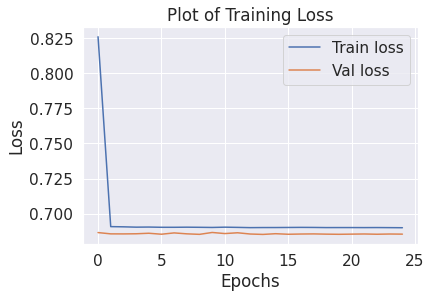

In [27]:
# plot the training loss

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

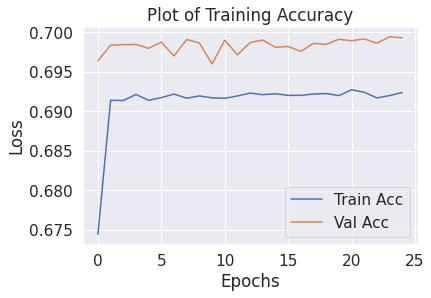

In [28]:
# plot the training accuracy

# plt.plot(h.history['accuracy'], label='Train Acc')
plt.plot(h.history['acc'], label='Train Acc')
# plt.plot(h.history['val_accuracy'], label='Val Acc')
plt.plot(h.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

# **Model Evaluation**

---


1.   Print the final test/validation loss and accuracy.
2.   Print confusion matrix and classification report for the validation dataset. Write a summary for the best and worst performing class and the overall trend.




**Testing the Model**

In [29]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtestval, Ytestval)

320000/320000 [==============================] - 23s 70us/sample - loss: 0.6845 - acc: 0.7006


In [30]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.6845032750129699
Testing accuracy  0.700625


**Confusion matrix and classification report for the validation dataset**

In [31]:
prediction = dnnModel.predict_classes(Xtestval)
print(prediction)
# print(Ytest.shape)
# print(Ytest)
print(' \n confusion_matrix \n')
print(confusion_matrix(Ytest,prediction))
print(' \n classification_report \n')
print(classification_report(Ytest,prediction))
# dnnModel1
# dnnModel2

[0 0 1 ... 1 0 0]
 
 confusion_matrix 

[[110863  48631]
 [ 47169 113337]]
 
 classification_report 

              precision    recall  f1-score   support

           0       0.70      0.70      0.70    159494
           1       0.70      0.71      0.70    160506

    accuracy                           0.70    320000
   macro avg       0.70      0.70      0.70    320000
weighted avg       0.70      0.70      0.70    320000



**Summary for the best and worst performing class and the overall trend.**

It is observed that class 1 has highest recall
 while both class's have same precision and f1-score.

# **Hyperparameter Tuning**

---
Build two more models by changing the following hyperparameters one at a time. 

Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model.

1.   Dropout: Change the position and value of dropout layer.
2.   Batch Size: Change the value of batch size in model training.

Write a comparison between each model and give reasonsfor the difference in results. Also, make a comparison with the state-of-the-art accuracy for this dataset.

## Dropout: Change the position and value of dropout layer

1. Model Building

 **DNN Model**

---




Using Keras, create the DNN or Sequential Model

In [32]:
# Create a model object

dnnModel1 = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [33]:
# Layer 1 = input layer
# specify the input size for in the first layer. --  with Regularizers

dnnModel1.add(layers.Dense(100, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          activity_regularizer=regularizers.l2(0.01), 
                          input_shape= (128,)
                          ))


# Layer 2 = hidden layer  with Regularizers
dnnModel1.add(layers.Dense(70, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))
# Add dropout of 50% to layer 2
#dnnModel1.add(layers.Dropout(0.5))

# Layer 3 = hidden layer  with Regularizers
dnnModel1.add(layers.Dense(30, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))
# changed drpopout position and reduced dropout value
# Add dropout of 20% to layer 3
dnnModel1.add(layers.Dropout(0.20))


# Layer 4 = output layer  with Regularizers
dnnModel1.add(layers.Dense(2, activation='softmax', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

dnnModel1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_5 (Dense)              (None, 70)                7070      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                2130      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 62        
Total params: 22,162
Trainable params: 22,162
Non-trainable params: 0
_________________________________________________________________


2. Model Compilation

Regularization and Optimizations of DNN

In [34]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
#dnnModel1.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

NUM_EPOCHS = 25
INIT_LR = 0.001
BS = 1024       
opt = Adam(lr=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
# opt = 'adam'
dnnModel1.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'] )

3. Model Training

**Train the Model**

In [35]:
# train the model
#h1 = dnnModel1.fit( Xtrainval, Ytrainval, epochs=25, validation_split=0.2, batch_size=512)
start_time = time.time()
h1 = dnnModel1.fit( Xtrainval, Ytrainval, epochs=NUM_EPOCHS, validation_split=0.2, batch_size=BS)
print("--- %s seconds taken for training---" % (time.time() - start_time))

Train on 1024000 samples, validate on 256000 samples
Epoch 1/25
1024000/1024000 [==============================] - 7s 6us/sample - loss: 0.8229 - acc: 0.6832 - val_loss: 0.6861 - val_acc: 0.6965
Epoch 2/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6878 - acc: 0.6943 - val_loss: 0.6852 - val_acc: 0.6989
Epoch 3/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6875 - acc: 0.6947 - val_loss: 0.6850 - val_acc: 0.6987
Epoch 4/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6874 - acc: 0.6952 - val_loss: 0.6851 - val_acc: 0.6980
Epoch 5/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6873 - acc: 0.6949 - val_loss: 0.6848 - val_acc: 0.6985
Epoch 6/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6872 - acc: 0.6955 - val_loss: 0.6852 - val_acc: 0.6984
Epoch 7/25
1024000/1024000 [==============================] - 5s 5us/sample - loss: 0.6873 - ac

In [36]:
print('Final training loss \t', h1.history['loss'][-1])
print('Final training accuracy ', h1.history['acc'][-1])

Final training loss 	 0.6867018973231316
Final training accuracy  0.6959209


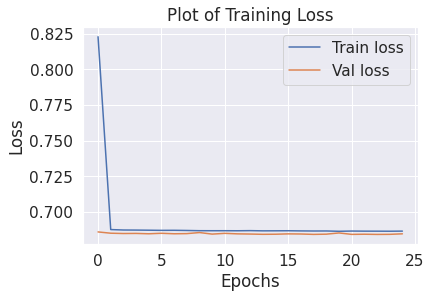

In [37]:
# plot the training loss

plt.plot(h1.history['loss'], label='Train loss')
plt.plot(h1.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

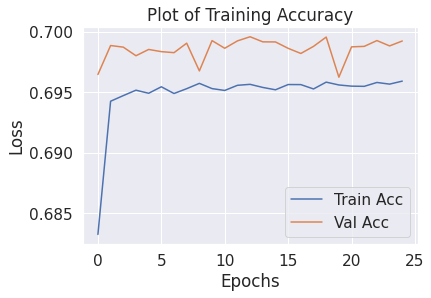

In [38]:
# plot the training accuracy

plt.plot(h1.history['acc'], label='Train Acc')
plt.plot(h1.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

4. Model Evaluation


**Testing the Model**

In [39]:
# testing the model

testLoss1, testAccuracy1 = dnnModel1.evaluate( Xtestval, Ytestval)


320000/320000 [==============================] - 22s 68us/sample - loss: 0.6840 - acc: 0.6999


In [40]:
print('Testing loss \t', testLoss1)
print('Testing accuracy ', testAccuracy1)

Testing loss 	 0.6839746617496013
Testing accuracy  0.6999


**Confusion matrix and classification report for the validation dataset**

In [41]:
prediction1 = dnnModel1.predict_classes(Xtestval)
print(prediction1)
# print(Ytest.shape)
# print(Ytest)
print(' \n confusion_matrix \n')
print(confusion_matrix(Ytest,prediction1))
print(' \n classification_report \n')
print(classification_report(Ytest,prediction1))

[0 0 1 ... 1 0 0]
 
 confusion_matrix 

[[116624  42870]
 [ 53162 107344]]
 
 classification_report 

              precision    recall  f1-score   support

           0       0.69      0.73      0.71    159494
           1       0.71      0.67      0.69    160506

    accuracy                           0.70    320000
   macro avg       0.70      0.70      0.70    320000
weighted avg       0.70      0.70      0.70    320000



**Summary for the best and worst performing class and the overall trend.**

It is observed that class 0 has highest recall and f1-score while class 1 has highest precision.

## Batch Size: Change the value of batch size in model training

1. Model Building

 **DNN Model**

---




Using Keras, create the DNN or Sequential Model

In [42]:
# Create a model object

dnnModel2 = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [43]:
# Layer 1 = input layer
# specify the input size for in the first layer. --  with Regularizers

dnnModel2.add(layers.Dense(100, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01), 
                          activity_regularizer=regularizers.l2(0.01), 
                          input_shape= (128,)
                          ))

# Layer 2 = hidden layer  with Regularizers
dnnModel2.add(layers.Dense(70, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))
# Add dropout of 50% to layer 2
dnnModel2.add(layers.Dropout(0.5))

# Layer 3 = hidden layer  with Regularizers
dnnModel2.add(layers.Dense(30, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

# Layer 4 = output layer  with Regularizers
dnnModel2.add(layers.Dense(2, activation='softmax', 
                          kernel_regularizer=regularizers.l2(0.01),
                          activity_regularizer=regularizers.l2(0.01)
                          ))

dnnModel2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_9 (Dense)              (None, 70)                7070      
_________________________________________________________________
dropout_2 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                2130      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 62        
Total params: 22,162
Trainable params: 22,162
Non-trainable params: 0
_________________________________________________________________


2. Model Compilation

Regularization and Optimizations of DNN

In [44]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
# dnnModel2.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

NUM_EPOCHS = 25
INIT_LR = 0.001
BS = 2048 # doubled batch size       
opt = Adam(lr=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
# opt = 'adam'
dnnModel2.compile( optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'] )

3. Model Training

**Testing the Model**

In [45]:
# train the model

# h2 = dnnModel2.fit( Xtrainval, Ytrainval, epochs=25, validation_split=0.2, batch_size=1024) 
start_time = time.time()
h2 = dnnModel2.fit( Xtrainval, Ytrainval, epochs=NUM_EPOCHS, validation_split=0.2, batch_size=BS)
print("--- %s seconds taken for training---" % (time.time() - start_time))

Train on 1024000 samples, validate on 256000 samples
Epoch 1/25
1024000/1024000 [==============================] - 4s 4us/sample - loss: 0.9624 - acc: 0.6677 - val_loss: 0.6857 - val_acc: 0.6982
Epoch 2/25
1024000/1024000 [==============================] - 3s 3us/sample - loss: 0.6897 - acc: 0.6924 - val_loss: 0.6855 - val_acc: 0.6977
Epoch 3/25
1024000/1024000 [==============================] - 3s 3us/sample - loss: 0.6898 - acc: 0.6918 - val_loss: 0.6855 - val_acc: 0.6981
Epoch 4/25
1024000/1024000 [==============================] - 3s 3us/sample - loss: 0.6897 - acc: 0.6927 - val_loss: 0.6858 - val_acc: 0.6982
Epoch 5/25
1024000/1024000 [==============================] - 3s 3us/sample - loss: 0.6898 - acc: 0.6923 - val_loss: 0.6856 - val_acc: 0.6984
Epoch 6/25
1024000/1024000 [==============================] - 3s 3us/sample - loss: 0.6896 - acc: 0.6926 - val_loss: 0.6852 - val_acc: 0.6985
Epoch 7/25
1024000/1024000 [==============================] - 3s 3us/sample - loss: 0.6895 - ac

In [46]:
print('Final training loss \t', h2.history['loss'][-1])
print('Final training accuracy ', h2.history['acc'][-1])

Final training loss 	 0.6893128333091736
Final training accuracy  0.6926943


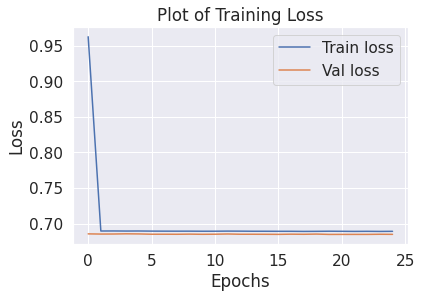

In [47]:
# plot the training loss

plt.plot(h2.history['loss'], label='Train loss')
plt.plot(h2.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

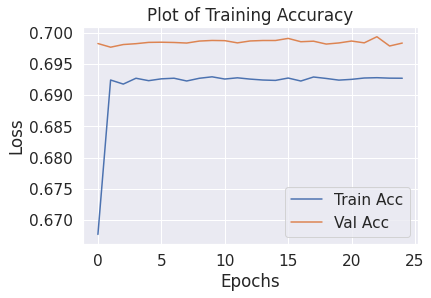

In [48]:
# plot the training accuracy

plt.plot(h2.history['acc'], label='Train Acc')
plt.plot(h2.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

4. Model Evaluation

**Testing the Model**

In [49]:
# testing the model

testLoss2, testAccuracy2 = dnnModel2.evaluate( Xtestval, Ytestval)

320000/320000 [==============================] - 22s 68us/sample - loss: 0.6841 - acc: 0.6997


In [50]:
print('Testing loss \t', testLoss2)
print('Testing accuracy ', testAccuracy2)

Testing loss 	 0.6840803014338016
Testing accuracy  0.69974065


**Confusion matrix and classification report for the validation dataset**

In [51]:
prediction2 = dnnModel2.predict_classes(Xtestval)
print(prediction2)
# print(Ytest.shape)
# print(Ytest)
print(' \n confusion_matrix \n')
print(confusion_matrix(Ytest,prediction2))
print(' \n classification_report \n')
print(classification_report(Ytest,prediction2))

[0 0 1 ... 1 0 0]
 
 confusion_matrix 

[[109819  49675]
 [ 46408 114098]]
 
 classification_report 

              precision    recall  f1-score   support

           0       0.70      0.69      0.70    159494
           1       0.70      0.71      0.70    160506

    accuracy                           0.70    320000
   macro avg       0.70      0.70      0.70    320000
weighted avg       0.70      0.70      0.70    320000



**Summary for the best and worst performing class and the overall trend.**

It is observed that class 1 has highest recall
while both class's have same precision and f1-score.

# **Model Comparisons**

---



In [52]:
print('Final training loss - h  -->\t', h.history['loss'][-1])
print('Final training loss - h1  --> \t', h1.history['loss'][-1])
print('Final training loss - h2  --> \t', h2.history['loss'][-1])

print('\n')

print('Final training accuracy - h  --> ', h.history['acc'][-1])
print('Final training accuracy - h1  --> ', h1.history['acc'][-1])
print('Final training accuracy - h3  --> ', h2.history['acc'][-1])

Final training loss - h  -->	 0.6899472246170044
Final training loss - h1  --> 	 0.6867018973231316
Final training loss - h2  --> 	 0.6893128333091736


Final training accuracy - h  -->  0.6923848
Final training accuracy - h1  -->  0.6959209
Final training accuracy - h3  -->  0.6926943


In [53]:
print('Testing loss for dnnModel \t', testLoss)
print('Testing loss for dnnModel1 \t', testLoss1)
print('Testing loss for dnnModel2 \t', testLoss2)

print('\n')

print('Testing accuracy for dnnModel ', testAccuracy)
print('Testing accuracy for dnnModel1 ', testAccuracy1)
print('Testing accuracy for dnnModel2 ', testAccuracy2)

Testing loss for dnnModel 	 0.6845032750129699
Testing loss for dnnModel1 	 0.6839746617496013
Testing loss for dnnModel2 	 0.6840803014338016


Testing accuracy for dnnModel  0.700625
Testing accuracy for dnnModel1  0.6999
Testing accuracy for dnnModel2  0.69974065


Analysis from above observed results :



1.   Model 1 has highest Training loss while Model 2 has lowest
2.   Model 2 has highest Training accuracy while Model 1 has lowest
3.   Model 1 has highest Testing loss while Model 2 has lowest
4.   Model 1 has highest Testing accuracy while Model 2 has lowest



From the 3 models created, the maximim accuracy (Testing) achieved is above 70%.
state-of-the-art accuracy for this dataset is more than 85%